In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows to understand the data structure
display(df.head())

# Check basic info to see data types and identify missing values
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


None

In [2]:
print("Missing values before cleaning:\n", df.isnull().sum())

# 1. Handling 'Age': We will fill missing ages with the median age.
# The median is less sensitive to extreme outliers than the mean.
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Handling 'Embarked': Only 2 missing values, so we fill with the mode (most frequent port).
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# 3. Handling 'Cabin': Since over 75% of cabin data is missing, it's safer to drop the column 
# for standard analysis, or we can create a binary feature "Has_Cabin". We will drop it here.
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [3]:
# Feature 1: Family Size
# Combine SibSp (siblings/spouses) and Parch (parents/children) plus 1 (the passenger themselves)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Feature 2: Is_Alone
# Create a binary column: 1 if the passenger is alone, 0 if they have family aboard
df['Is_Alone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Feature 3: Title Extraction
# We can extract the title (Mr, Mrs, Miss, etc.) from the 'Name' column using Regular Expressions
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles into a single category called 'Rare' to keep the data clean
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Display the new features
display(df[['Name', 'Title', 'FamilySize', 'Is_Alone']].head())

,Name,Title,FamilySize,Is_Alone
0,"Braund, Mr. Owen Harris",Mr,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0
2,"Heikkinen, Miss. Laina",Miss,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0
4,"Allen, Mr. William Henry",Mr,1,1


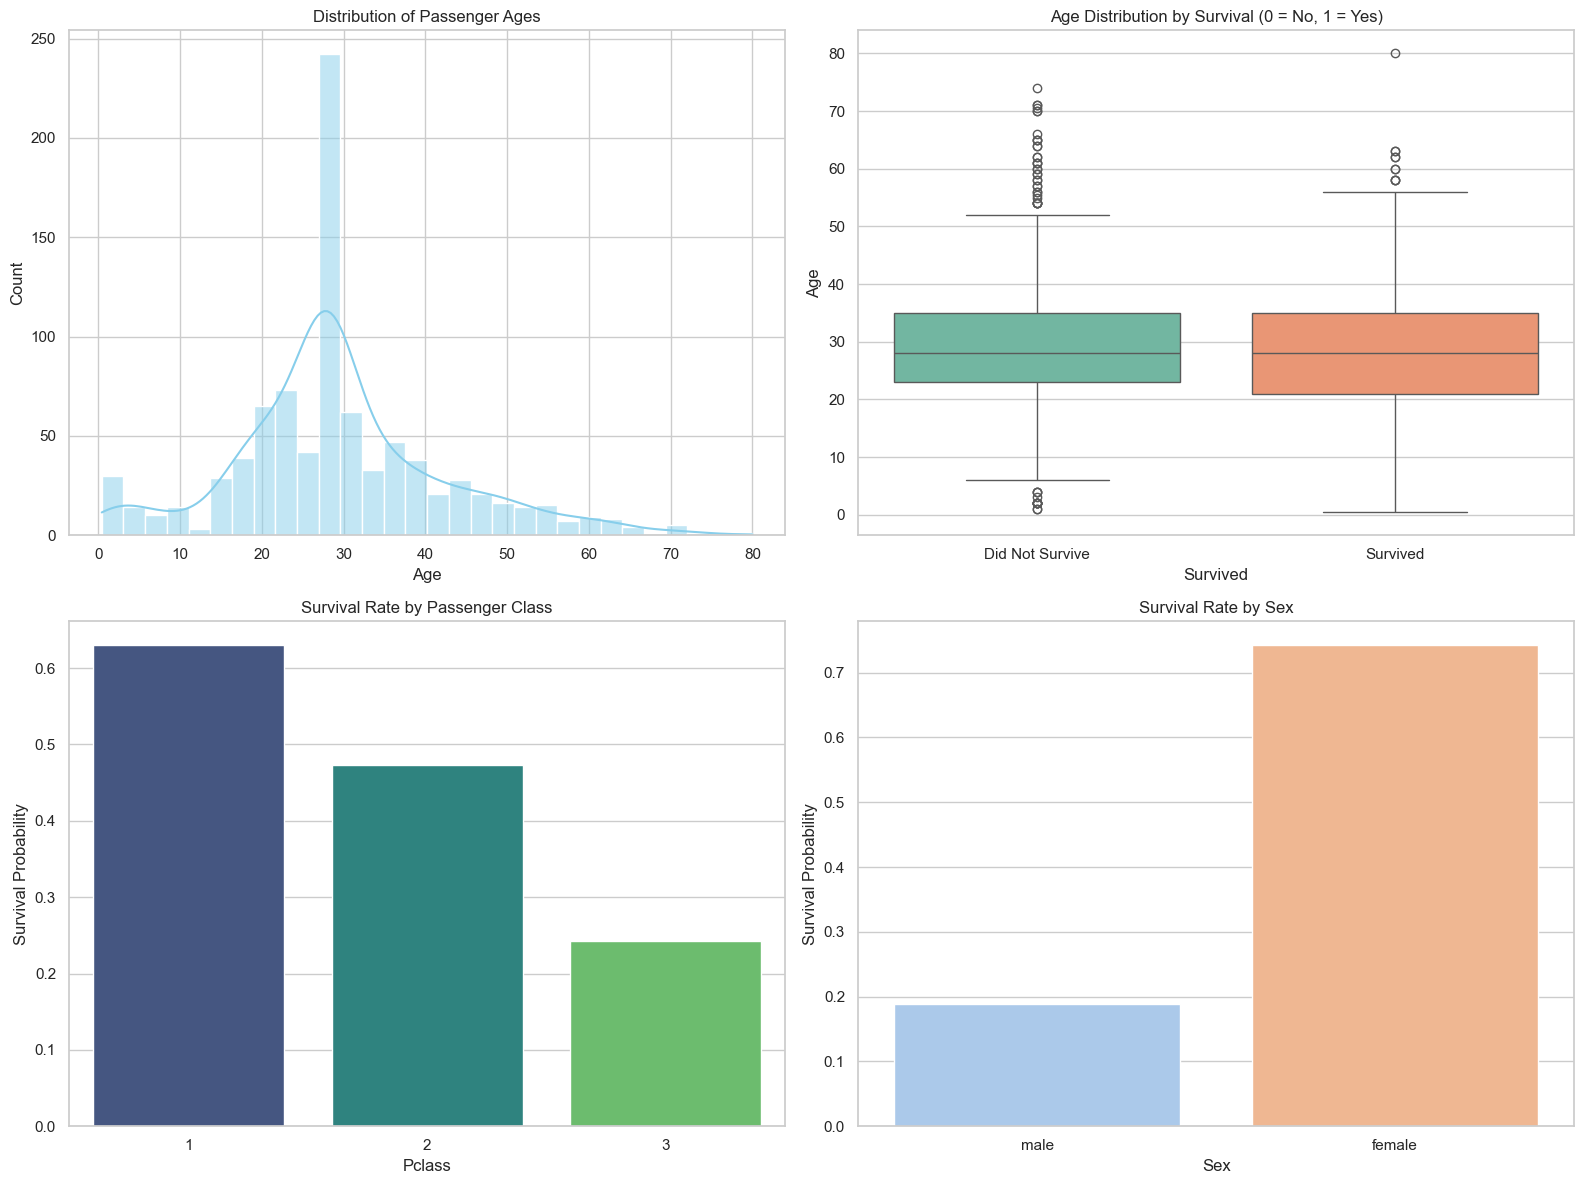

In [4]:
# Set up a figure with subplots for organized charts
plt.figure(figsize=(16, 12))

# 1. Histogram: Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Boxplot: Age vs. Survival
# Shows how the age distribution differs between those who survived and those who didn't
plt.subplot(2, 2, 2)
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival (0 = No, 1 = Yes)')
plt.xticks([0,1], ['Did Not Survive', 'Survived'])

# 3. Barplot: Survival Rate by Passenger Class
plt.subplot(2, 2, 3)
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis', errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')

# 4. Barplot: Survival Rate by Sex
plt.subplot(2, 2, 4)
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel', errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()

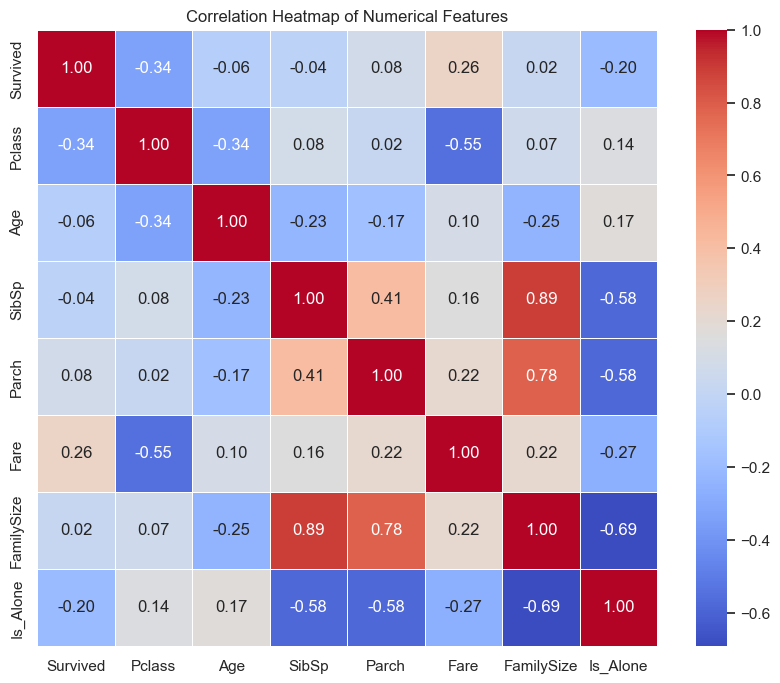

In [5]:
# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Drop PassengerId as it is just an index and has no analytical value
numeric_df = numeric_df.drop(columns=['PassengerId'])

plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()